In [24]:
import os

os.chdir('/home/rask/Dropbox/teaching/css_fall2023')

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons, load_digits
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline


sns.set_theme()

# Model Capacity

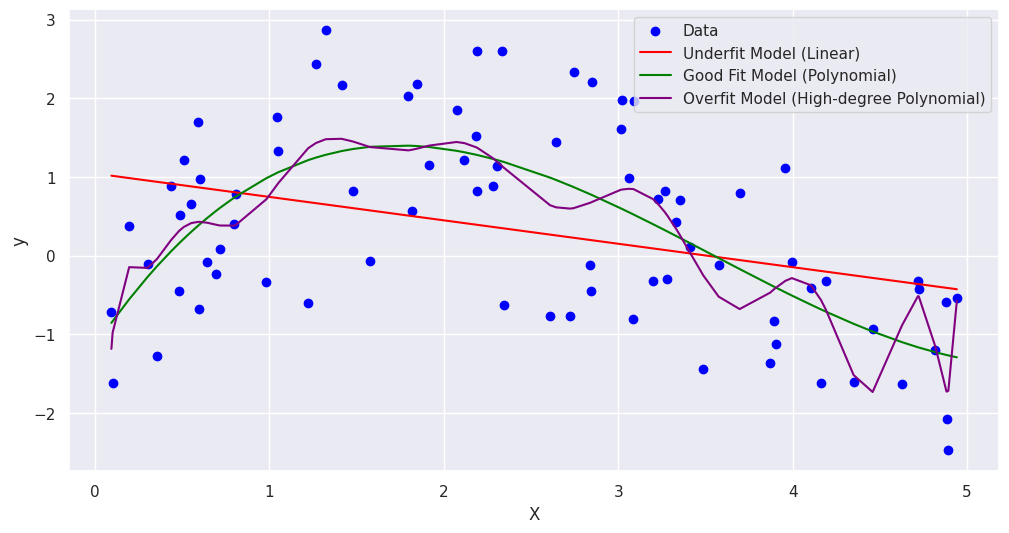

In [91]:
# Generate synthetic data with a nonlinear pattern
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 1, X.shape[0])

# Fit models for underfitting, good fit, and overfitting
model_underfit = LinearRegression()
model_underfit.fit(X, y)

polyreg_goodfit = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
polyreg_goodfit.fit(X, y)

polyreg_overfit = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
polyreg_overfit.fit(X, y)

# Plot all three models
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model_underfit.predict(X), color='red', label='Underfit Model (Linear)')
plt.plot(X, polyreg_goodfit.predict(X), color='green', label='Good Fit Model (Polynomial)')
plt.plot(X, polyreg_overfit.predict(X), color='purple', label='Overfit Model (High-degree Polynomial)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('')
plt.savefig('figures/class04-modelcapacity.pdf')
plt.show()

# Illustration of Clustering

In [54]:
# Generate synthetic moon-shaped data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

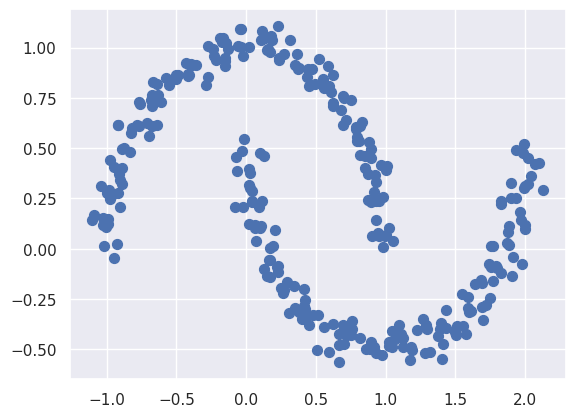

In [56]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("")
plt.savefig('figures/class04-cluster-data.pdf')
plt.show()

In [58]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, eigen_solver="arpack", affinity="nearest_neighbors", random_state=42)
spectral_labels = spectral.fit_predict(X)

/home/rask/Dropbox/teaching/css_fall2023/css-fall2023-topic2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rask/Dropbox/teaching/css_fall2023/css-fall2023-topic2/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


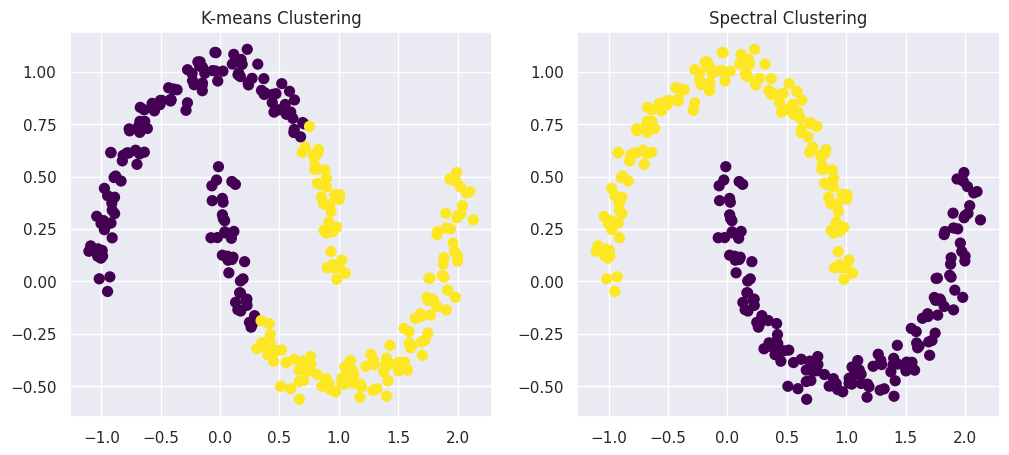

In [59]:
# Create a side-by-side plot
plt.figure(figsize=(12, 5))

# Plot K-means clustering results on the left
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap="viridis")
plt.title("K-means Clustering")

# Plot Spectral Clustering results on the right
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, s=50, cmap="viridis")
plt.title("Spectral Clustering")
plt.savefig('figures/class04-cluster-output.pdf')
plt.show()

# Illustration of Dimensionality Reduction

In [60]:
# Load a sample dataset (handwritten digits)
digits = load_digits()
X = digits.data
y = digits.target

In [61]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

/tmp/ipykernel_63619/1510995300.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
/tmp/ipykernel_63619/1510995300.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10))


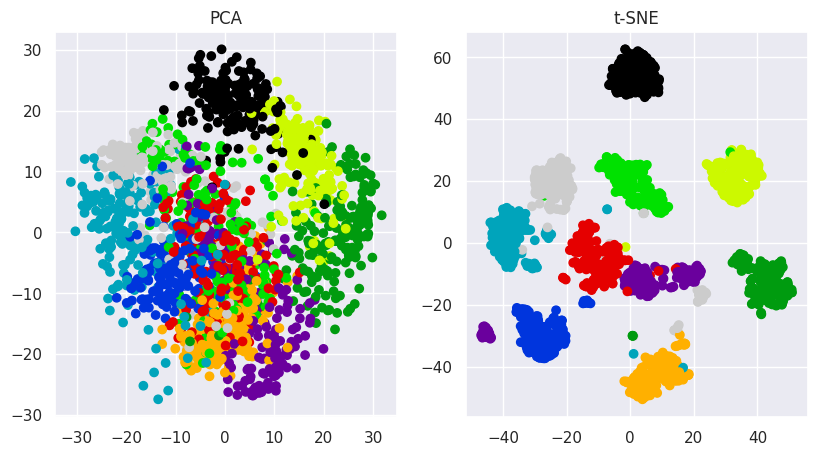

In [62]:
# Create subplots for visual comparison
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('PCA')

plt.subplot(132)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('t-SNE')

plt.savefig('figures/class04-pca-output.pdf')

plt.show()

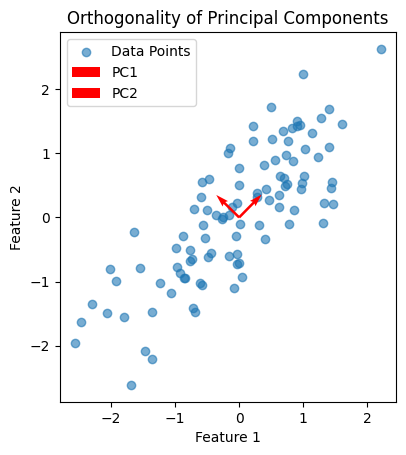

In [7]:
# Define the mean and covariance matrix for the multivariate Gaussian
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]

# Generate samples from the multivariate Gaussian
np.random.seed(0)
data = np.random.multivariate_normal(mean, cov, 100)

# Compute the covariance matrix of the data
covariance_matrix = np.cov(data, rowvar=False)

# Calculate the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Extract the first two principal components
principal_components = eigenvectors[:, :2]

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Data Points')

# Plot the principal components as vectors from the mean
for i in range(2):
    plt.quiver(mean[0], mean[1], principal_components[0, i], principal_components[1, i], angles='xy', scale_units='xy', scale=2, color='r', label=f'PC{i+1}')

# Set axis labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Set equal aspect ratio for the plot
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.title('Orthogonality of Principal Components')
plt.show()

# Logistic Regression

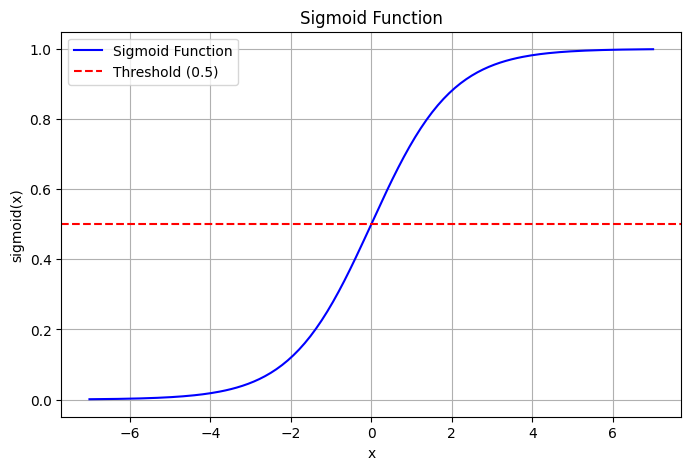

In [10]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for the x-axis
x = np.linspace(-7, 7, 200)

# Calculate sigmoid values for the y-axis
y = sigmoid(x)

# Create a plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

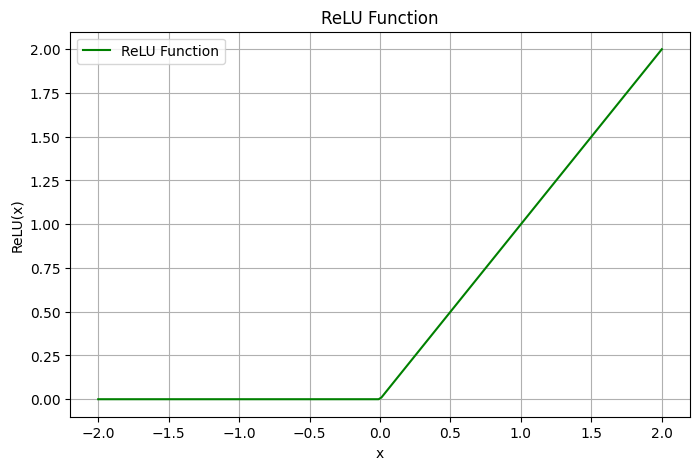

In [11]:
# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate values for the x-axis
x = np.linspace(-2, 2, 200)

# Calculate ReLU values for the y-axis
y = relu(x)

# Create a plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='ReLU Function', color='green')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Function')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Logistic Regression: Linear Separable Data

Accuracy: 0.99
Confusion Matrix:
[[200   2]
 [  1 197]]


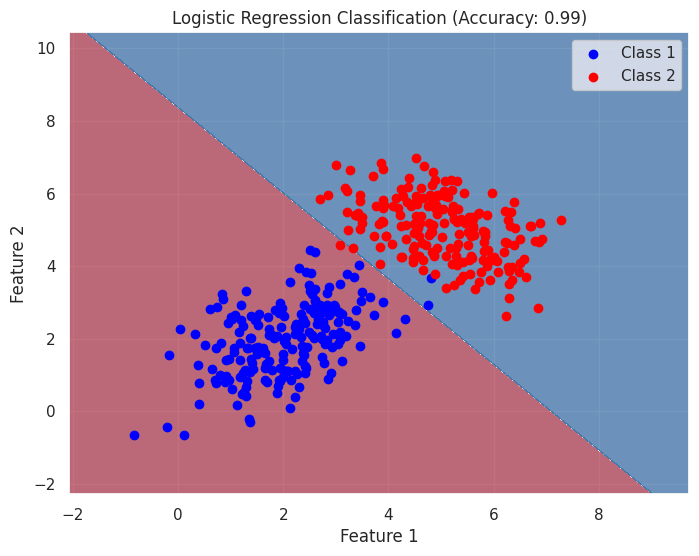

In [36]:
# Set random seed for reproducibility
np.random.seed(0)

# Define the means and variances for two Gaussian distributions (two classes)
mean1 = [2, 2]  # Mean for class 1
cov1 = [[1, 0.5], [0.5, 1]]  # Covariance matrix for class 1

mean2 = [5, 5]  # Mean for class 2
cov2 = [[1, -0.5], [-0.5, 1]]  # Covariance matrix for class 2

# Generate random data points for each class
num_samples = 1000
class1_samples = np.random.multivariate_normal(mean1, cov1, num_samples)
class2_samples = np.random.multivariate_normal(mean2, cov2, num_samples)

# Create labels for the classes (0 for class 1, 1 for class 2)
class1_labels = np.zeros(num_samples)
class2_labels = np.ones(num_samples)

# Combine the data points and labels
data = np.vstack((class1_samples, class2_samples))
labels = np.hstack((class1_labels, class2_labels))

# Shuffle the data randomly
indices = np.arange(2 * num_samples)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy and display the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the decision boundary
xx, yy = np.meshgrid(np.arange(data[:, 0].min() - 1, data[:, 0].max() + 1, 0.01),
                     np.arange(data[:, 1].min() - 1, data[:, 1].max() + 1, 0.01))
Z = logistic_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label='Class 1', color='blue')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Class 2', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Logistic Regression Classification (Accuracy: {accuracy:.2f})')
plt.legend()
plt.grid(True)
plt.savefig('figures/class04-logistic-linear-decision.pdf')
plt.show()

In [ ]:
# Visualize the raw data with different colors for each class
plt.figure(figsize=(8, 6))
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], label='Class 1', color='blue', alpha=0.7)
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], label='Class 2', color='red', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('')
plt.legend()
plt.grid(True)
plt.savefig('figures/class04-logistic-linear-data.pdf')
plt.show()

# Logistic Regression: Non-linear Data

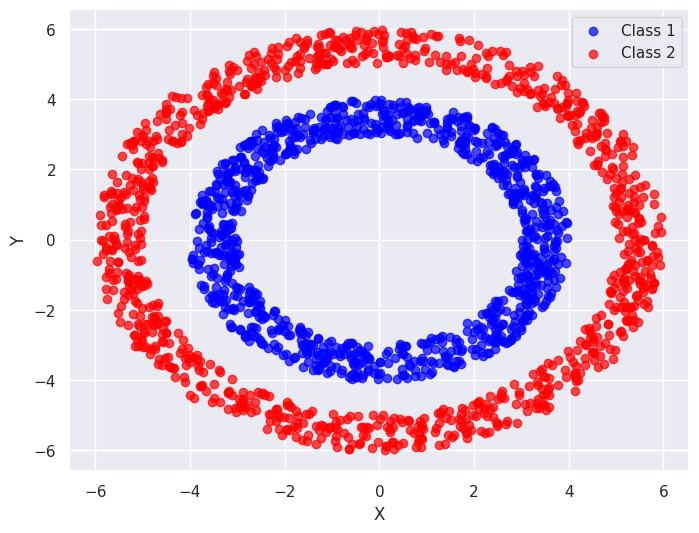

In [44]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate circular data for class 1
num_samples = 1000
theta = 2 * np.pi * np.random.rand(num_samples)
radius = 3 + np.random.rand(num_samples)
class1_x = radius * np.cos(theta)
class1_y = radius * np.sin(theta)
class1_labels = np.zeros(num_samples)

# Generate circular data for class 2
theta = 2 * np.pi * np.random.rand(num_samples)
radius = 5 + np.random.rand(num_samples)
class2_x = radius * np.cos(theta)
class2_y = radius * np.sin(theta)
class2_labels = np.ones(num_samples)

# Combine the data points and labels
data = np.vstack((np.hstack((class1_x, class2_x)), np.hstack((class1_y, class2_y)))).T
labels = np.hstack((class1_labels, class2_labels))

# Shuffle the data randomly
indices = np.arange(2 * num_samples)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


# Visualize the circular data with different colors for each class
plt.figure(figsize=(8, 6))
plt.scatter(class1_x, class1_y, label='Class 1', color='blue', alpha=0.7)
plt.scatter(class2_x, class2_y, label='Class 2', color='red', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('')
plt.legend()
plt.grid(True)
plt.savefig('figures/class04-logistic-nonlinear-data.pdf')
plt.show()

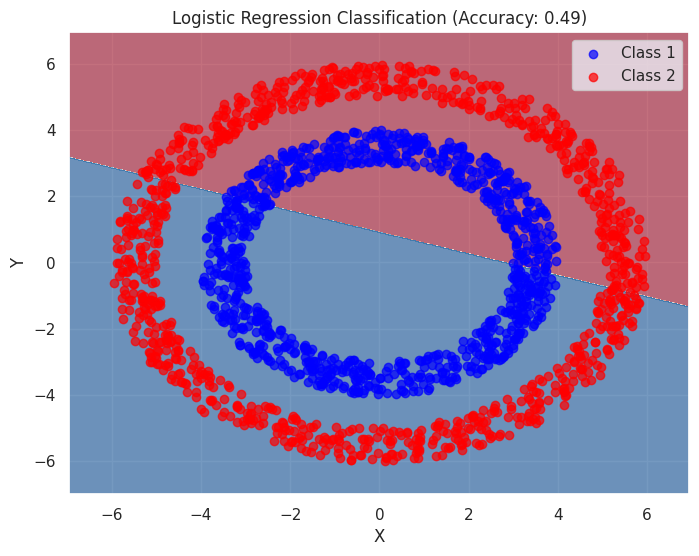

In [46]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy and display the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Create a mesh grid of points to visualize the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for the mesh grid points
Z = logistic_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(class1_x, class1_y, label='Class 1', color='blue', alpha=0.7)
plt.scatter(class2_x, class2_y, label='Class 2', color='red', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Logistic Regression Classification (Accuracy: {accuracy:.2f})')
plt.legend()
plt.grid(True)
plt.savefig('figures/class04-logistic-nonlinear-decision.pdf')
plt.show()

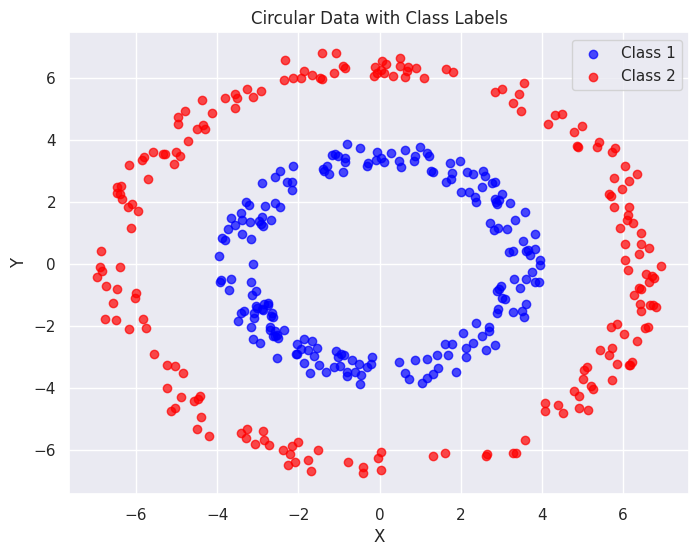

Accuracy: 1.00
Confusion Matrix:
[[37  0]
 [ 0 43]]


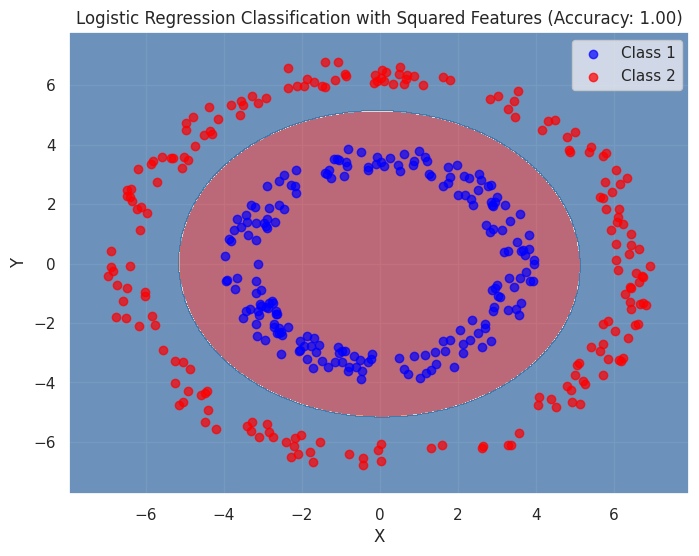

In [48]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate circular data for class 1
num_samples = 200
theta = 2 * np.pi * np.random.rand(num_samples)
radius = 3 + np.random.rand(num_samples)
class1_x = radius * np.cos(theta)
class1_y = radius * np.sin(theta)
class1_labels = np.zeros(num_samples)

# Generate circular data for class 2
theta = 2 * np.pi * np.random.rand(num_samples)
radius = 6 + np.random.rand(num_samples)
class2_x = radius * np.cos(theta)
class2_y = radius * np.sin(theta)
class2_labels = np.ones(num_samples)

# Combine the data points and labels
data = np.vstack((np.hstack((class1_x, class2_x)), np.hstack((class1_y, class2_y)))).T
labels = np.hstack((class1_labels, class2_labels))

# Shuffle the data randomly
indices = np.arange(2 * num_samples)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Add squared input features
poly = PolynomialFeatures(degree=2)
data_poly = poly.fit_transform(data)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data_poly, labels, test_size=0.2, random_state=42)

# Visualize the circular data with different colors for each class
plt.figure(figsize=(8, 6))
plt.scatter(class1_x, class1_y, label='Class 1', color='blue', alpha=0.7)
plt.scatter(class2_x, class2_y, label='Class 2', color='red', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Circular Data with Class Labels')
plt.legend()
plt.grid(True)
plt.show()

# Train a logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy and display the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Create a mesh grid of points to visualize the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for the mesh grid points
Z = logistic_reg.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(class1_x, class1_y, label='Class 1', color='blue', alpha=0.7)
plt.scatter(class2_x, class2_y, label='Class 2', color='red', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Logistic Regression Classification with Squared Features (Accuracy: {accuracy:.2f})')
plt.legend()
plt.grid(True)
plt.show()
